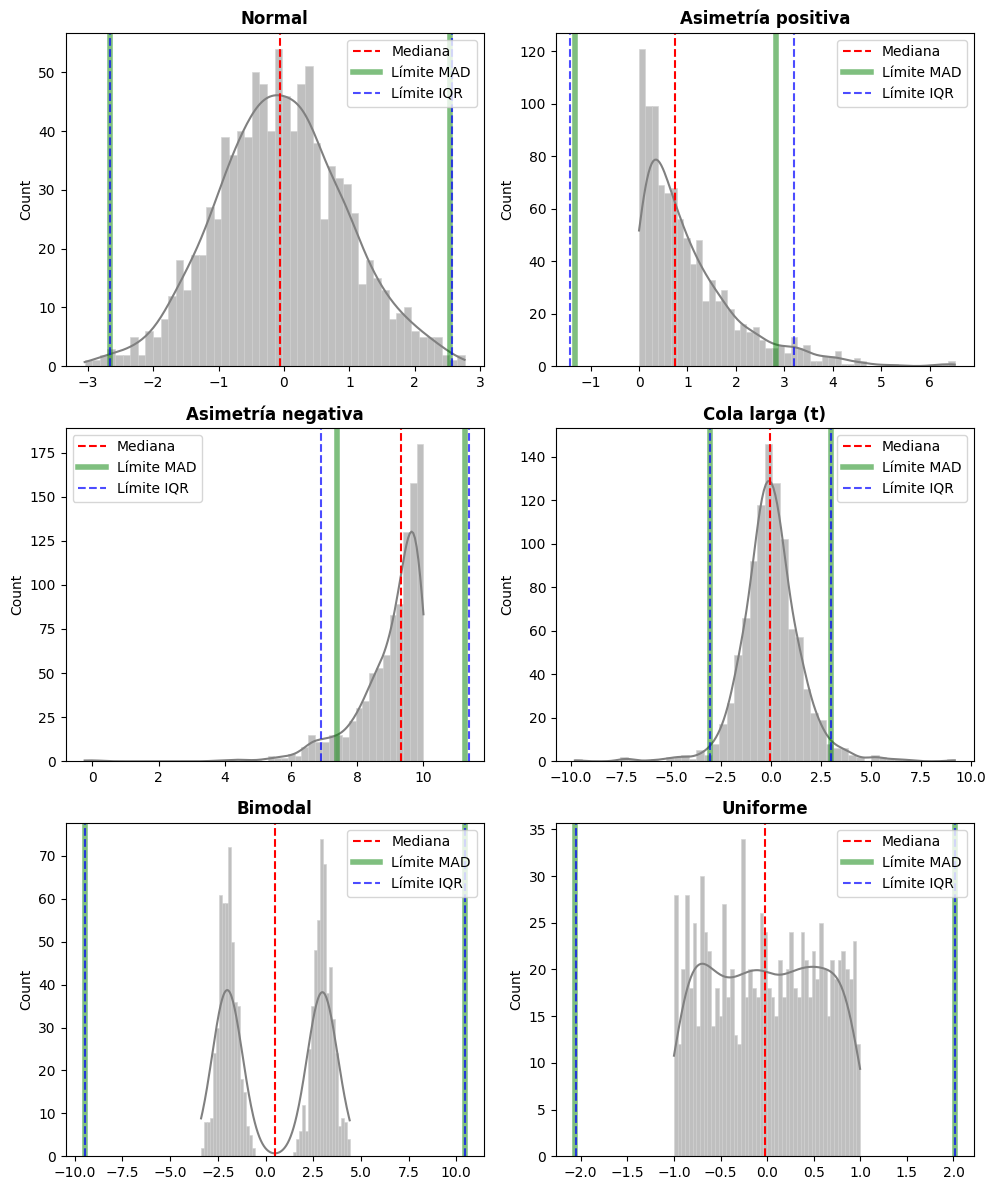

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t

# Distribuciones sintéticas
np.random.seed(0)
normal_data = np.random.normal(loc=0, scale=1, size=1000)
positive_skew = np.random.exponential(scale=1.0, size=1000)
negative_skew = 10 - np.random.exponential(scale=1.0, size=1000)
heavy_tail = t.rvs(df=3, size=1000)
bimodal = np.concatenate([
    np.random.normal(loc=-2, scale=0.5, size=500),
    np.random.normal(loc=3, scale=0.5, size=500)
])
uniform_data = np.random.uniform(low=-1, high=1, size=1000)

# Distribuciones
distributions = {
    'Normal': normal_data,
    'Asimetría positiva': positive_skew,
    'Asimetría negativa': negative_skew,
    'Cola larga (t)': heavy_tail,
    'Bimodal': bimodal,
    'Uniforme': uniform_data
}

# Parámetro MAD
threshold = 4

# Gráficas
plt.figure(figsize=(10, 12))

for i, (name, data) in enumerate(distributions.items(), 1):
    median = np.median(data)
    mad = np.median(np.abs(data - median))
    scale_factor = threshold * mad
    lower_limit_mad = median - scale_factor
    upper_limit_mad = median + scale_factor

    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_limit_iqr = q1 - 1.5 * iqr
    upper_limit_iqr = q3 + 1.5 * iqr

    plt.subplot(3, 2, i)
    sns.histplot(data, kde=True, bins=50, color='gray', edgecolor='lightgray')
    plt.axvline(median, color='red', linestyle='--', label='Mediana')
    plt.axvline(lower_limit_mad, color='green', label='Límite MAD', alpha=0.5, linewidth=4)
    plt.axvline(upper_limit_mad, color='green', alpha=0.5, linewidth=4)
    plt.axvline(lower_limit_iqr, color='blue', linestyle='--', label='Límite IQR', alpha=0.7)
    plt.axvline(upper_limit_iqr, color='blue', linestyle='--', alpha=0.7)
    plt.title(name, fontdict={'fontweight': 'bold'})
    plt.legend()

plt.tight_layout()
plt.show()
